In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import spacy
from nltk.probability import FreqDist
sns.set_style("darkgrid")
from wordcloud import WordCloud
from transformers import pipeline

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
filename = "Doctor_strange_in_the _multiverse_of_madness_movie_review.csv"

In [3]:
review_data = pd.read_csv(filename)

In [4]:
# load the spacy ml train model
nlp = spacy.load("en_core_web_sm")

/home/royale/.local/lib/python3.9/site-packages/spacy/util.py:865: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


### Checking for the number of NaN using msno module

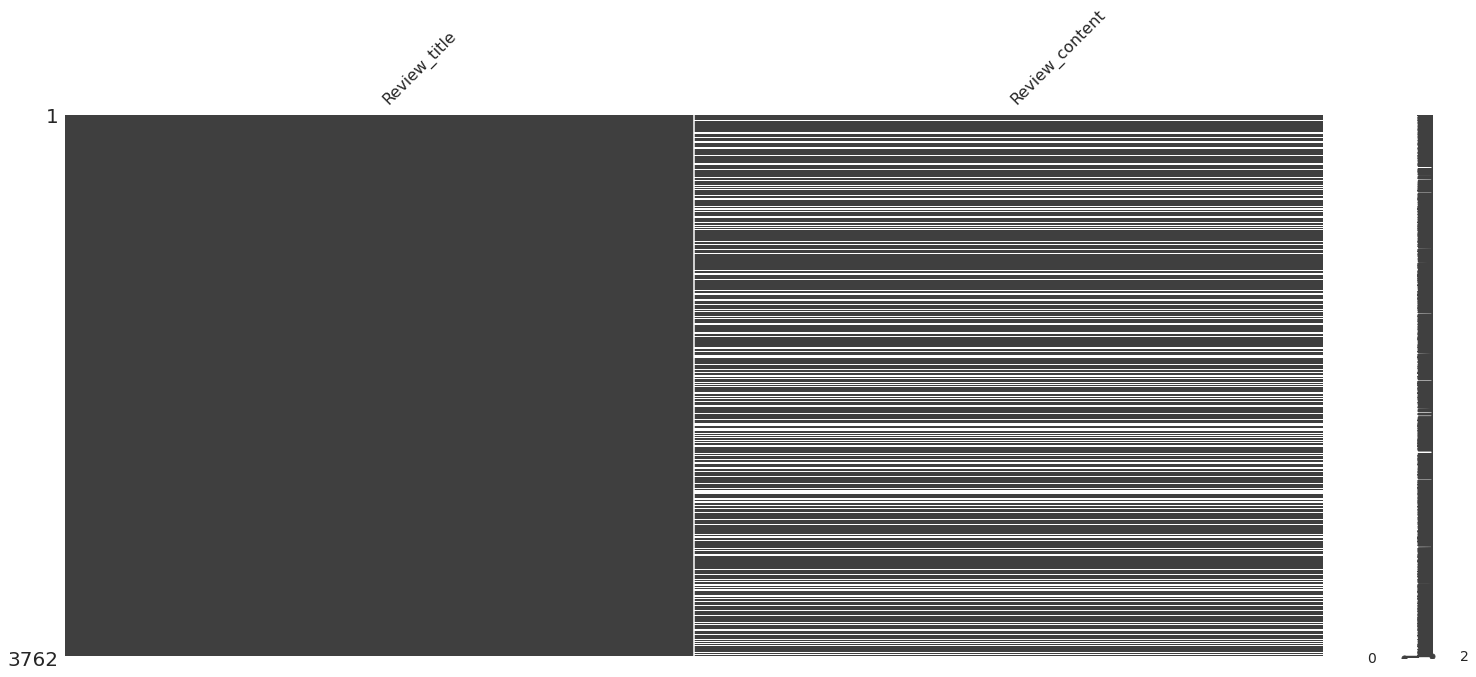

In [5]:
#checking for missing values in the dataset
msno.matrix(review_data);

In [6]:
review_data.sample(10)

,Review_title,Review_content
2336,Sam Rami saved this film,There is just enough sam Rami to turn this int...
1056,Waste of time to watch,NaN
302,Someone has been watching Fringe....,I am not quite sure if this was an ode to Frin...
1428,Wtf did I just watch?,I havde No words.... Its absolut madness to wa...
2134,10/10,NaN
3236,Better than The Batman,There is a ridiculousness that exists among fa...
3734,"It's madness, but entertaining",It's madness all the incursions occurring duri...
3482,Huge disappointment compared to the first movie.,The first Dr. Strange movie was a serious work...
602,Not the greatest marvel movie ever but damn good,NaN
335,Half way in between horror and adventure,Multiverse is just a base concept to weigh Wan...


In [7]:
review_data_needeed = review_data[["Review_title"]]

In [8]:
review_data_needeed

,Review_title
0,"This was Wandavision 2, not Doctor Strange 2"
1,"Well, it was shiny and colourful"
2,Not enough multiverse and maybe too much madness
3,"Scarlet Witch: The Movie, ft: Sorcerer Supremes"
4,"Terrible plot and script, boring and pointless"
...,...
3757,NaN
3758,NaN
3759,NaN
3760,NaN


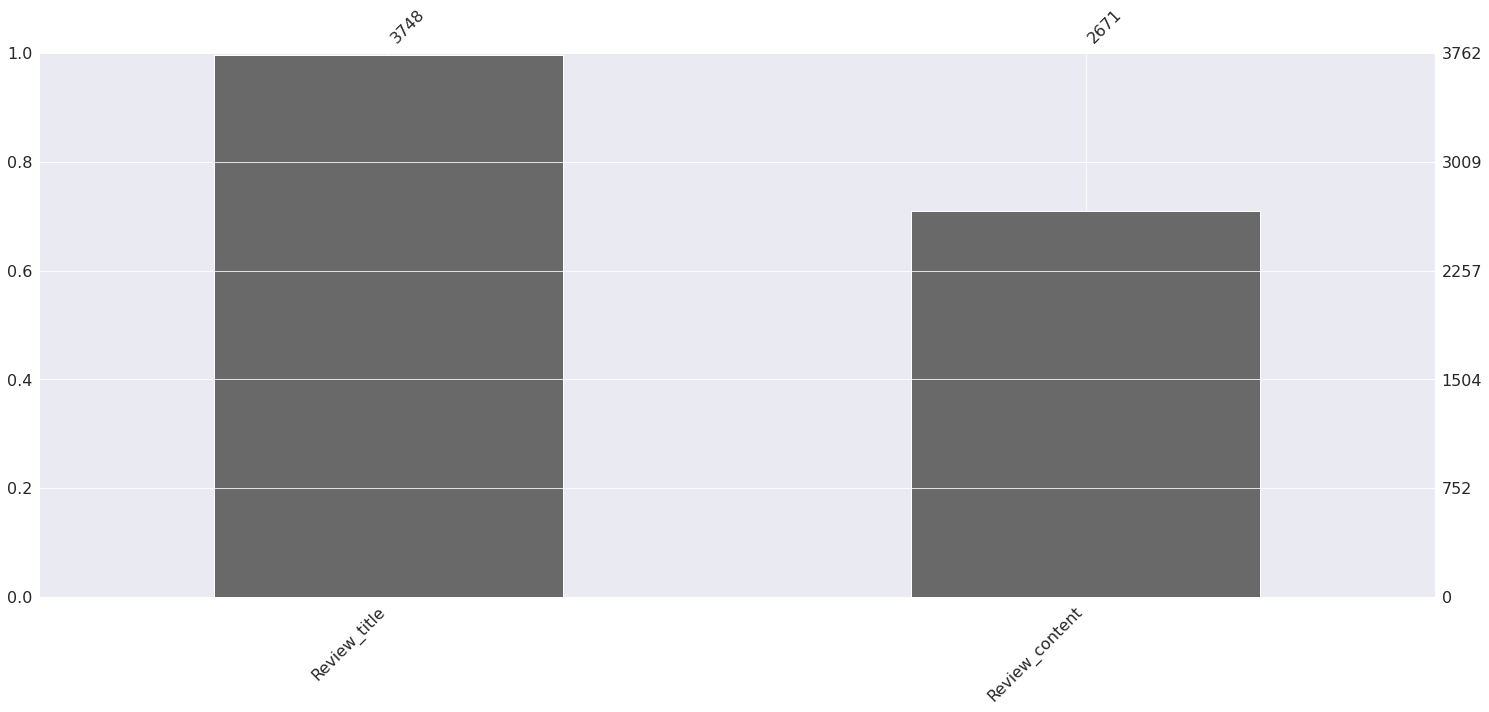

In [9]:
msno.bar(review_data);

In [10]:
review_data.shape

(3762, 2)

### Drop all NaN values,because they will not be needed during analysis

In [11]:
dropped = review_data.dropna()

In [12]:
#checking the shape of the dropped values
dropped.shape

(2665, 2)

In [13]:
clean_review = dropped[["Review_title"]]

In [14]:
clean_review

,Review_title
2,Not enough multiverse and maybe too much madness
4,"Terrible plot and script, boring and pointless"
6,"somewhere in the multiverse, there's a better ..."
9,Time to retire the MCU
10,Pretentious nonsensical hokum
...,...
3739,This review has nothing to do with this great ...
3740,Strange Feeling
3742,I'd watch wonder woman 84 again over this
3744,"Small, but with creative visual effects"


In [15]:
# library for performing a sentiment analysis
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [16]:
review_content = dropped[["Review_content"]]
review_content

,Review_content
2,Sam Raimi definitely put a splash of horror in...
4,I always had some issues with MCU films but no...
6,The overall pacing is relentless and the seque...
9,"After months of hype, we are left with a mess ..."
10,Richard Burton wasted his talents on alcohol. ...
...,...
3739,"As a Muslim, I am not shocked by some of ""them..."
3740,The movie graphics and action were.entertainin...
3742,I love marvel I do...but after endgame it seem...
3744,Must watch for Marvel fans. One time watchable...


In [17]:
# A function to perform sentiment values on the reviews
def sentiment(content):
    outcome = sent_pipeline(content)[0].get("label")
    return outcome
result = lambda x:sentiment(x)
    

### Performing a sentiment analysis on the "Review_title" column and add it to the "dropped-frame"

In [18]:
dropped["Sentiment"] = dropped["Review_title"].map(result)

<ipython-input-18-6b14f53b7f4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped["Sentiment"] = dropped["Review_title"].map(result)


In [19]:
dropped

,Review_title,Review_content,Sentiment
2,Not enough multiverse and maybe too much madness,Sam Raimi definitely put a splash of horror in...,NEGATIVE
4,"Terrible plot and script, boring and pointless",I always had some issues with MCU films but no...,NEGATIVE
6,"somewhere in the multiverse, there's a better ...",The overall pacing is relentless and the seque...,NEGATIVE
9,Time to retire the MCU,"After months of hype, we are left with a mess ...",NEGATIVE
10,Pretentious nonsensical hokum,Richard Burton wasted his talents on alcohol. ...,NEGATIVE
...,...,...,...
3739,This review has nothing to do with this great ...,"As a Muslim, I am not shocked by some of ""them...",POSITIVE
3740,Strange Feeling,The movie graphics and action were.entertainin...,NEGATIVE
3742,I'd watch wonder woman 84 again over this,I love marvel I do...but after endgame it seem...,POSITIVE
3744,"Small, but with creative visual effects",Must watch for Marvel fans. One time watchable...,POSITIVE


In [20]:
dropped["Sentiment"].value_counts()

NEGATIVE    1481
POSITIVE    1184
Name: Sentiment, dtype: int64

### Visualization of the sentiment counts

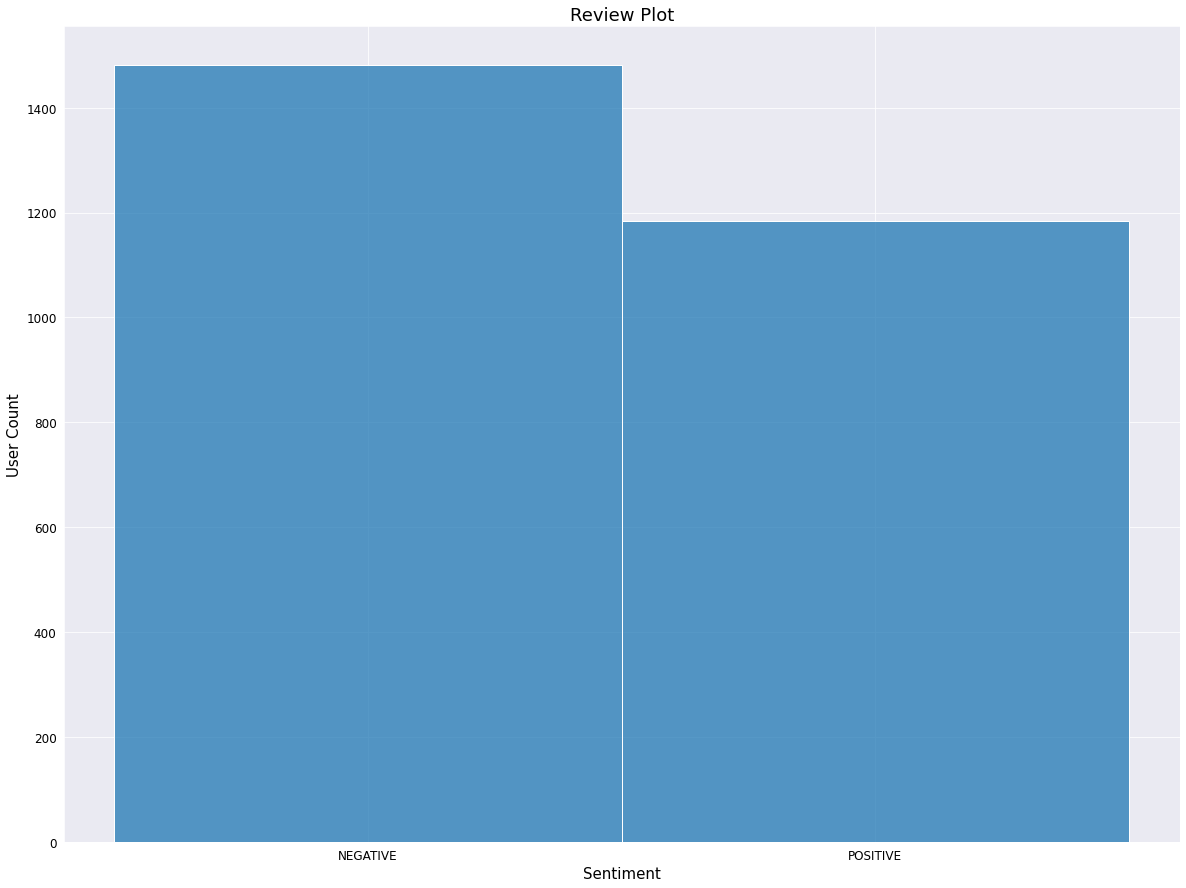

In [21]:
plt.figure(figsize = (20, 15))
plt.title("Review Plot", color = "black", fontsize = 18)
plt.xlabel("Sentiment", color = "black", fontsize = 15)
plt.ylabel("User Count", color = "black", fontsize = 15)
plt.xticks(color = "black", fontsize = 12)
plt.yticks(color = "black", fontsize = 12)
sns.histplot(x=dropped["Sentiment"], data = dropped);

### Observation:
From the plot above, it can be observed that there were more negative reviews than the positive reviews according to the data scraped from https://www.imdb.com/title/tt9419884/reviews?sort=helpfulnessScore&dir=desc&ratingFilter=0. There was a total review count of 3762, and 2665 valid reviews.

## Find the most used Negative words

In [22]:
negative_words = dropped[dropped["Sentiment"] == "NEGATIVE"]

In [23]:
negative_words["Review_title"]

2        Not enough multiverse and maybe too much madness
4          Terrible plot and script, boring and pointless
6       somewhere in the multiverse, there's a better ...
9                                  Time to retire the MCU
10                          Pretentious nonsensical hokum
                              ...                        
3730          Great Visually but storyline makes no sense
3732                             I didn't like the script
3736                        Too much branches and details
3740                                      Strange Feeling
3747                                   All over the place
Name: Review_title, Length: 1481, dtype: object

## Using Spacy, Tokenize the words

In [24]:
def sentiment_token(words):
    adj_tokens = []
    tokens = nlp(words)
    # Now find the POS of those words, and return tokens with Ajectives as POS...
    for toks in tokens:
        if toks.pos_ == "ADJ":
            #store those words in a list
            adj_tokens.append(toks.text)
    return adj_tokens
result = lambda x:sentiment_token(x)

In [25]:
negative_tokens = negative_words["Review_title"].map(result).to_list()

In [26]:
negs = []
negative_reviews = [negs for negs in negative_tokens if len(negs) != 0]
for revs_ in negative_reviews:
    for revs in revs_:
        negs.append(revs.lower()) #we have to normalize the words by making them all lowercase


In [27]:
#view the first 50 values of the negative tokens
negs[:50]

['enough',
 'much',
 'terrible',
 'boring',
 'pointless',
 'better',
 'pretentious',
 'nonsensical',
 'disappointing',
 'strange',
 'terrible',
 'bad',
 'favorite',
 'worst',
 'worst',
 'shallow',
 'first',
 'embarrassing',
 'wrong',
 'cinema',
 'disappointing',
 'multi',
 'unbearable',
 'poorest',
 'full',
 'mad',
 'mad',
 'jumble',
 'worst',
 'good',
 'closer',
 'better',
 'more',
 'much',
 'worth',
 'low',
 'big',
 'dull',
 'worst',
 'real',
 'worst',
 'total',
 'worst',
 'terrible',
 'impressed',
 'terrible',
 'disappointing',
 'complete',
 'amazing',
 'pure']

### Note:
When you look at the "negs" list tokens closely, you will observe that we have some postive tokens such as "great", "amazing", etc... This is as a result of some sarcastic reviews which were given by the users which happens to be negative. When tokenizing this reviews, since I am focusing on the words which had a negative impression, I had to use Part of Speech to extracitve words with Adjectival connotions in order to visualize them, that is why we happen to have such words there. In order for our visualization to be great and perfect, we have to remove tokens which had those words in them...

#### Approach:
To tackle this problem, we have to run a sentiment check on our negative tokens, and filter out the "Negative" tokens, then use that to plot a wordcloud to visualize this...

### Note:
This approach will be done for both "Positive" and "Negative" Sentiments. do not be confused if you see any repition of code with little changes down the line

In [28]:
negative_tokens = []
for words in negs:
    if sent_pipeline(words)[0].get("label") == "NEGATIVE":
        negative_tokens.append(words)

#### Usin g NLTK librabry to perform Frequency Distribution of tokens. This will help in plotting of wordcloud

In [29]:

negative_freq = nltk.FreqDist(negative_tokens)

In [30]:
# Negative frequency of words
negative_freq

FreqDist({'worst': 59, 'bad': 43, 'disappointing': 38, 'terrible': 31, 'boring': 25, 'disappointed': 22, 'strange': 18, 'horrible': 13, 'awful': 12, 'poor': 11, ...})

### WordCloud for Negative Words Reviews

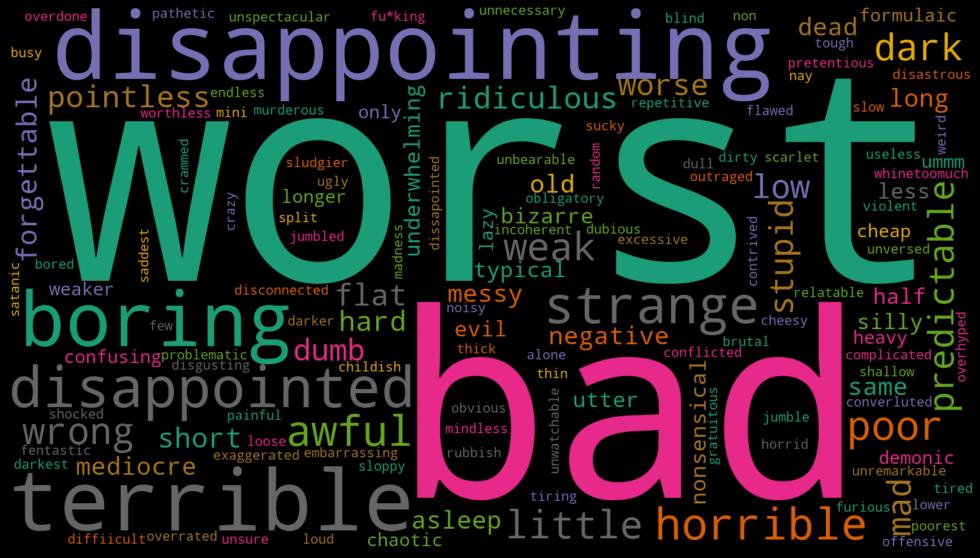

In [31]:
wrdcloud = WordCloud(background_color = "black", colormap = "Dark2", random_state = 1, collocations=False, width = 1600, height = 900)
plt.figure(figsize = (20, 10), facecolor = "k")
freq = wrdcloud.generate_from_frequencies(negative_freq)
plt.tight_layout(pad = 0)
plt.imshow(freq, interpolation = "bilinear")
plt.axis("off");

## Find the most used Postive words

In [32]:
positive_words = dropped[dropped["Sentiment"] == "POSITIVE"]

In [33]:
positive_words["Review_title"]

13                        Multiverse of... Something-ness
26      Some Bald Guy Once Said: Keep Your Expectation...
32      A Seriously Superb and Creative Concept Execut...
37                                         Profit mongers
42                                     A very 'Meh' movie
                              ...                        
3735                                      Awesome visuals
3738                                 Please! Save the MCU
3739    This review has nothing to do with this great ...
3742            I'd watch wonder woman 84 again over this
3744              Small, but with creative visual effects
Name: Review_title, Length: 1184, dtype: object

In [34]:
postitive_tokens = positive_words["Review_title"].map(result).to_list()

In [35]:
# View the first 20 positive tokens
postitive_tokens[:20]

[[],
 ['Disappointed'],
 ['Creative'],
 [],
 [],
 [],
 ['better', 'other', 'free'],
 [],
 ['Darkest'],
 [],
 [],
 ['Fantastic'],
 [],
 [],
 ['many', 'little', 'friendly'],
 [],
 [],
 [],
 ['exciting'],
 ['Curious']]

In [36]:
pos = []
positive_reviews = [posi for posi in postitive_tokens if len(posi) != 0]
for pos_ in positive_reviews:
    for revs in pos_:
        pos.append(revs.lower()) #we have to normalize the words by making them all lowercase


In [37]:
positive_tokens = []
for words in pos:
    if sent_pipeline(words)[0].get("label") == "POSITIVE":
        positive_tokens.append(words)

In [38]:
positive_freq = nltk.FreqDist(positive_tokens)

In [39]:
positive_freq

FreqDist({'good': 76, 'great': 62, 'best': 45, 'amazing': 39, 'better': 21, 'enjoyable': 17, 'different': 13, 'more': 13, 'entertaining': 13, 'stunning': 11, ...})

### WordCloud for Positive Words Reviews

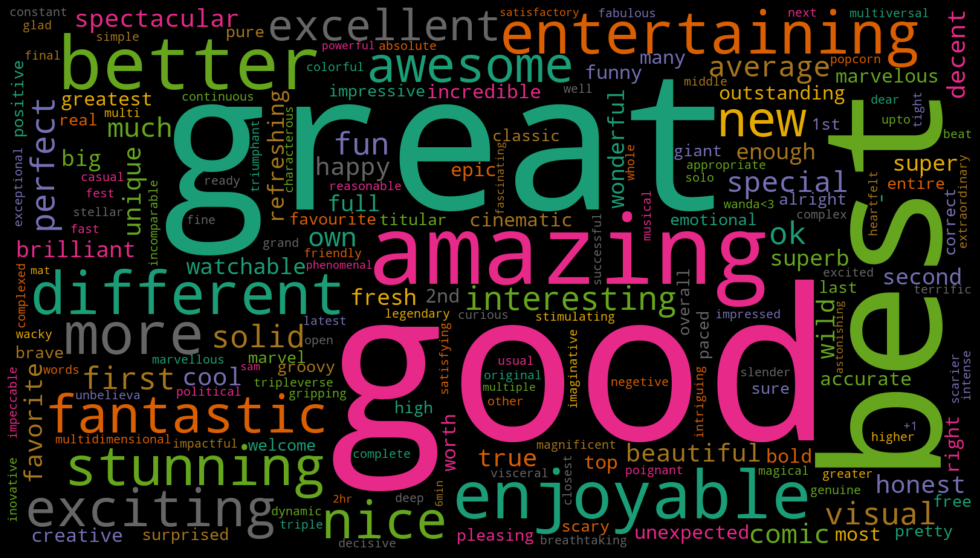

In [40]:
wrdcloud = WordCloud(background_color = "black", colormap = "Dark2", random_state = 1, collocations=False, width = 1600, height = 900)
plt.figure(figsize = (20, 10), facecolor = "k")
freq = wrdcloud.generate_from_frequencies(positive_freq)
plt.tight_layout(pad = 0)
plt.imshow(freq, interpolation = "bilinear")
plt.axis("off");